In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
import cartopy.crs as ccrs
from ipywidgets import interact, SelectionSlider
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from keras import backend as K

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# MNIST Tutorial for SciKit RBM

In [2]:
def gen_mnist_image(X):
    return np.rollaxis(np.rollaxis(X[0:200].reshape(20, -1, 28, 28), 0, 2), 1, 3).reshape(-1, 20 * 28)

In [3]:
from keras.datasets import mnist

(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [4]:
X_train = (X_train - np.min(X_train, 0)) / (np.max(X_train, 0) + 0.0001) 
X_train = X_train.reshape([-1,28*28]);

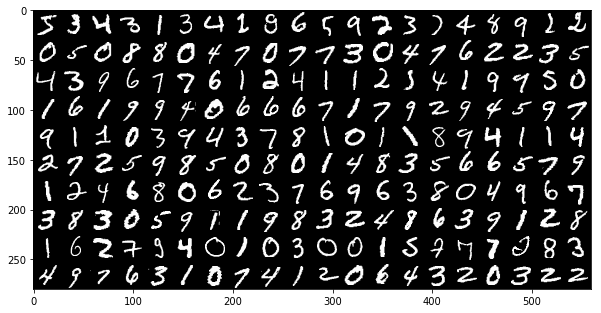

In [5]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(X_train), cmap='gray');

In [6]:
from sklearn.neural_network import BernoulliRBM
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, random_state=0, verbose=True)

In [7]:
rbm.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -111.82, time = 6.09s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -99.45, time = 6.93s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -91.74, time = 6.81s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -88.01, time = 6.83s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -84.91, time = 7.03s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -83.34, time = 7.17s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -82.09, time = 6.97s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -81.21, time = 6.91s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -80.05, time = 7.24s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -78.52, time = 7.28s


BernoulliRBM(batch_size=10, learning_rate=0.01, n_components=100, n_iter=10,
       random_state=0, verbose=True)

In [8]:
xx = X_train[:40].copy()
for ii in range(1000):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])

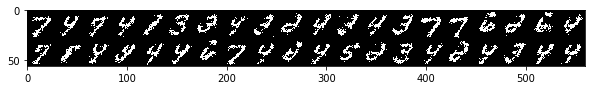

In [9]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(xx), cmap='gray')

In [10]:
xx = X_train[:40].copy()
for ii in range(10000):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])

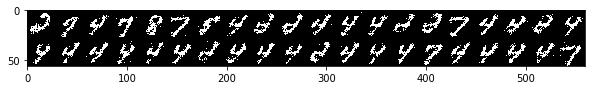

In [11]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(xx), cmap='gray')

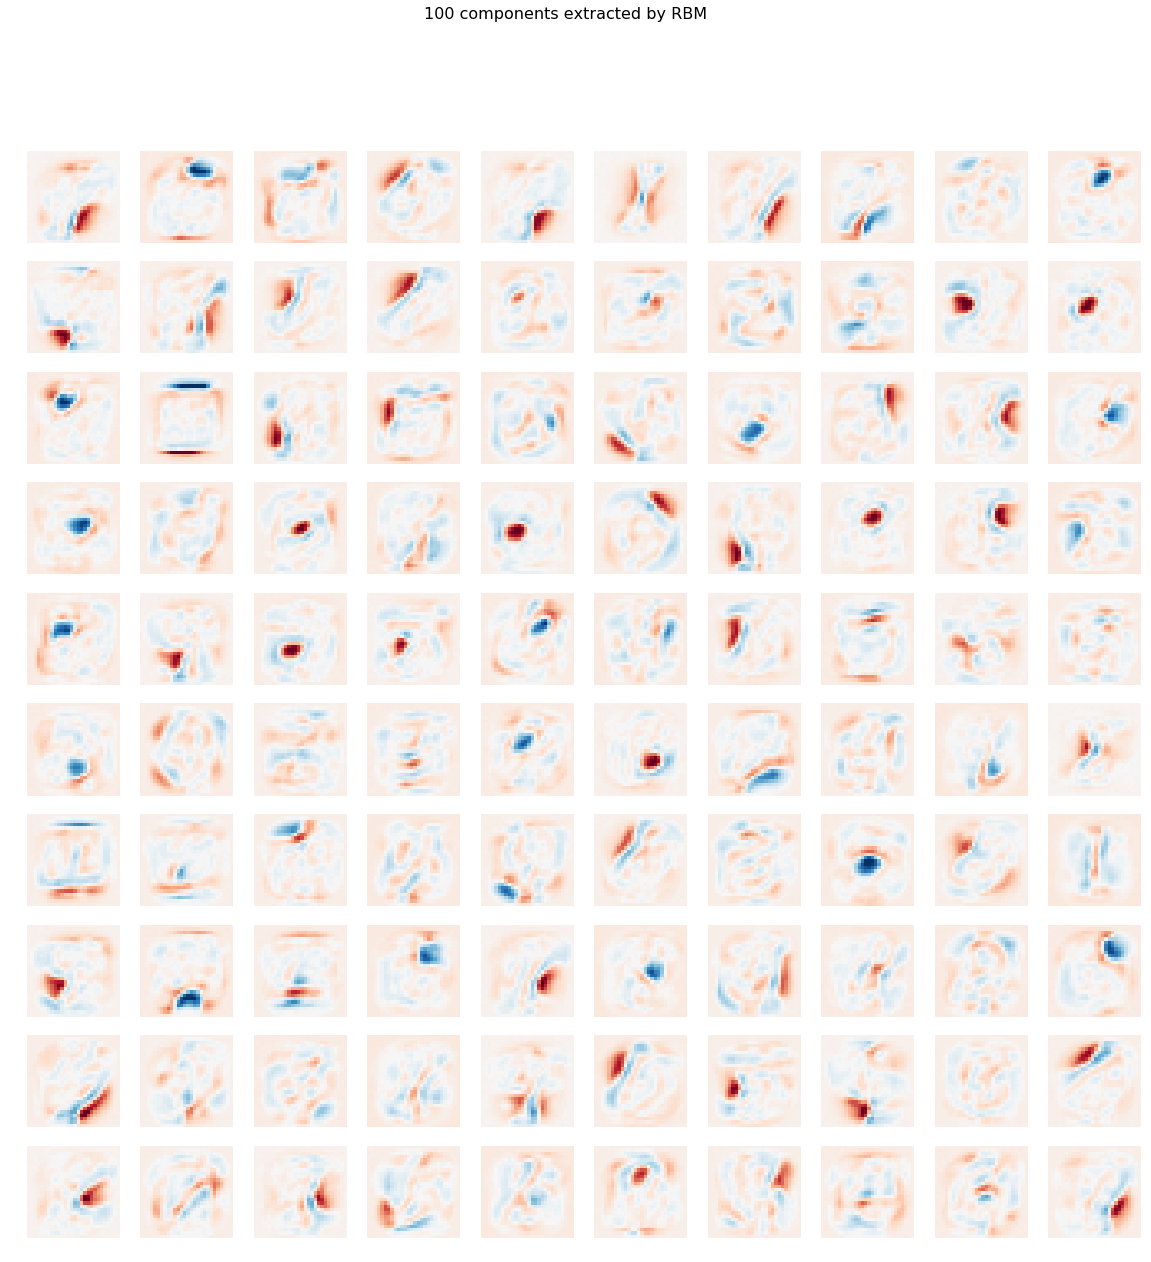

In [12]:
plt.figure(figsize=(20, 20))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.RdBu,
               interpolation='nearest', vmin=-2.5, vmax=2.5)
    plt.axis('off')
plt.suptitle('100 components extracted by RBM', fontsize=16);

# QuCumber Ising Example

In [13]:
X_train = pd.read_table('/Users/tuckerkj/Google Drive/Research/QML/data/quc_examples/Tutorial1_TrainPosRealWaveFunction/tfim1d_data.txt', delimiter=' ', usecols=range(10)).values

In [14]:
X_train.shape

(9999, 10)

In [15]:
print(X_train[0])

[1 1 1 1 0 0 1 0 1 1]


In [16]:
nh = X_train.shape[-1]

In [17]:
rbm = BernoulliRBM(n_components=nh, learning_rate=0.01, random_state=0, n_iter=5000, batch_size=100, verbose=True)

In [18]:
rbm.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -6.93, time = 0.02s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -6.93, time = 0.04s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -6.93, time = 0.03s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -6.93, time = 0.03s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -6.93, time = 0.03s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -6.93, time = 0.03s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -6.93, time = 0.03s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -6.92, time = 0.03s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -6.92, time = 0.03s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -6.92, time = 0.03s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -6.91, time = 0.03s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -6.90, time = 0.03s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -6.88, time = 0.03s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -6.86, time = 0.03s
[BernoulliRBM] Iteration 15, pseudo-likelih

[BernoulliRBM] Iteration 127, pseudo-likelihood = -5.17, time = 0.04s
[BernoulliRBM] Iteration 128, pseudo-likelihood = -5.15, time = 0.04s
[BernoulliRBM] Iteration 129, pseudo-likelihood = -5.14, time = 0.04s
[BernoulliRBM] Iteration 130, pseudo-likelihood = -5.13, time = 0.04s
[BernoulliRBM] Iteration 131, pseudo-likelihood = -5.12, time = 0.04s
[BernoulliRBM] Iteration 132, pseudo-likelihood = -5.11, time = 0.03s
[BernoulliRBM] Iteration 133, pseudo-likelihood = -5.10, time = 0.04s
[BernoulliRBM] Iteration 134, pseudo-likelihood = -5.09, time = 0.04s
[BernoulliRBM] Iteration 135, pseudo-likelihood = -5.08, time = 0.04s
[BernoulliRBM] Iteration 136, pseudo-likelihood = -5.07, time = 0.04s
[BernoulliRBM] Iteration 137, pseudo-likelihood = -5.06, time = 0.03s
[BernoulliRBM] Iteration 138, pseudo-likelihood = -5.05, time = 0.04s
[BernoulliRBM] Iteration 139, pseudo-likelihood = -5.04, time = 0.04s
[BernoulliRBM] Iteration 140, pseudo-likelihood = -5.03, time = 0.04s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 245, pseudo-likelihood = -4.79, time = 0.03s
[BernoulliRBM] Iteration 246, pseudo-likelihood = -4.78, time = 0.03s
[BernoulliRBM] Iteration 247, pseudo-likelihood = -4.78, time = 0.03s
[BernoulliRBM] Iteration 248, pseudo-likelihood = -4.78, time = 0.03s
[BernoulliRBM] Iteration 249, pseudo-likelihood = -4.78, time = 0.03s
[BernoulliRBM] Iteration 250, pseudo-likelihood = -4.77, time = 0.03s
[BernoulliRBM] Iteration 251, pseudo-likelihood = -4.77, time = 0.03s
[BernoulliRBM] Iteration 252, pseudo-likelihood = -4.77, time = 0.03s
[BernoulliRBM] Iteration 253, pseudo-likelihood = -4.77, time = 0.03s
[BernoulliRBM] Iteration 254, pseudo-likelihood = -4.77, time = 0.03s
[BernoulliRBM] Iteration 255, pseudo-likelihood = -4.76, time = 0.04s
[BernoulliRBM] Iteration 256, pseudo-likelihood = -4.76, time = 0.03s
[BernoulliRBM] Iteration 257, pseudo-likelihood = -4.76, time = 0.03s
[BernoulliRBM] Iteration 258, pseudo-likelihood = -4.76, time = 0.03s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 367, pseudo-likelihood = -4.67, time = 0.03s
[BernoulliRBM] Iteration 368, pseudo-likelihood = -4.67, time = 0.03s
[BernoulliRBM] Iteration 369, pseudo-likelihood = -4.67, time = 0.03s
[BernoulliRBM] Iteration 370, pseudo-likelihood = -4.67, time = 0.03s
[BernoulliRBM] Iteration 371, pseudo-likelihood = -4.66, time = 0.03s
[BernoulliRBM] Iteration 372, pseudo-likelihood = -4.67, time = 0.03s
[BernoulliRBM] Iteration 373, pseudo-likelihood = -4.66, time = 0.03s
[BernoulliRBM] Iteration 374, pseudo-likelihood = -4.66, time = 0.03s
[BernoulliRBM] Iteration 375, pseudo-likelihood = -4.66, time = 0.03s
[BernoulliRBM] Iteration 376, pseudo-likelihood = -4.66, time = 0.03s
[BernoulliRBM] Iteration 377, pseudo-likelihood = -4.66, time = 0.03s
[BernoulliRBM] Iteration 378, pseudo-likelihood = -4.66, time = 0.03s
[BernoulliRBM] Iteration 379, pseudo-likelihood = -4.66, time = 0.03s
[BernoulliRBM] Iteration 380, pseudo-likelihood = -4.66, time = 0.03s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 492, pseudo-likelihood = -4.61, time = 0.03s
[BernoulliRBM] Iteration 493, pseudo-likelihood = -4.61, time = 0.03s
[BernoulliRBM] Iteration 494, pseudo-likelihood = -4.61, time = 0.03s
[BernoulliRBM] Iteration 495, pseudo-likelihood = -4.60, time = 0.03s
[BernoulliRBM] Iteration 496, pseudo-likelihood = -4.60, time = 0.03s
[BernoulliRBM] Iteration 497, pseudo-likelihood = -4.61, time = 0.03s
[BernoulliRBM] Iteration 498, pseudo-likelihood = -4.60, time = 0.03s
[BernoulliRBM] Iteration 499, pseudo-likelihood = -4.60, time = 0.03s
[BernoulliRBM] Iteration 500, pseudo-likelihood = -4.60, time = 0.03s
[BernoulliRBM] Iteration 501, pseudo-likelihood = -4.60, time = 0.04s
[BernoulliRBM] Iteration 502, pseudo-likelihood = -4.60, time = 0.03s
[BernoulliRBM] Iteration 503, pseudo-likelihood = -4.60, time = 0.03s
[BernoulliRBM] Iteration 504, pseudo-likelihood = -4.60, time = 0.03s
[BernoulliRBM] Iteration 505, pseudo-likelihood = -4.60, time = 0.03s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 614, pseudo-likelihood = -4.58, time = 0.03s
[BernoulliRBM] Iteration 615, pseudo-likelihood = -4.58, time = 0.03s
[BernoulliRBM] Iteration 616, pseudo-likelihood = -4.58, time = 0.03s
[BernoulliRBM] Iteration 617, pseudo-likelihood = -4.58, time = 0.03s
[BernoulliRBM] Iteration 618, pseudo-likelihood = -4.58, time = 0.03s
[BernoulliRBM] Iteration 619, pseudo-likelihood = -4.59, time = 0.03s
[BernoulliRBM] Iteration 620, pseudo-likelihood = -4.58, time = 0.03s
[BernoulliRBM] Iteration 621, pseudo-likelihood = -4.58, time = 0.03s
[BernoulliRBM] Iteration 622, pseudo-likelihood = -4.59, time = 0.03s
[BernoulliRBM] Iteration 623, pseudo-likelihood = -4.58, time = 0.03s
[BernoulliRBM] Iteration 624, pseudo-likelihood = -4.58, time = 0.03s
[BernoulliRBM] Iteration 625, pseudo-likelihood = -4.58, time = 0.03s
[BernoulliRBM] Iteration 626, pseudo-likelihood = -4.58, time = 0.03s
[BernoulliRBM] Iteration 627, pseudo-likelihood = -4.58, time = 0.03s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 737, pseudo-likelihood = -4.57, time = 0.04s
[BernoulliRBM] Iteration 738, pseudo-likelihood = -4.58, time = 0.04s
[BernoulliRBM] Iteration 739, pseudo-likelihood = -4.58, time = 0.03s
[BernoulliRBM] Iteration 740, pseudo-likelihood = -4.57, time = 0.04s
[BernoulliRBM] Iteration 741, pseudo-likelihood = -4.57, time = 0.04s
[BernoulliRBM] Iteration 742, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 743, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 744, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 745, pseudo-likelihood = -4.57, time = 0.04s
[BernoulliRBM] Iteration 746, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 747, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 748, pseudo-likelihood = -4.58, time = 0.03s
[BernoulliRBM] Iteration 749, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 750, pseudo-likelihood = -4.57, time = 0.04s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 860, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 861, pseudo-likelihood = -4.57, time = 0.04s
[BernoulliRBM] Iteration 862, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 863, pseudo-likelihood = -4.58, time = 0.03s
[BernoulliRBM] Iteration 864, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 865, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 866, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 867, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 868, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 869, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 870, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 871, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 872, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Iteration 873, pseudo-likelihood = -4.57, time = 0.03s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 978, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 979, pseudo-likelihood = -4.56, time = 0.04s
[BernoulliRBM] Iteration 980, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 981, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 982, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 983, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 984, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 985, pseudo-likelihood = -4.57, time = 0.04s
[BernoulliRBM] Iteration 986, pseudo-likelihood = -4.56, time = 0.05s
[BernoulliRBM] Iteration 987, pseudo-likelihood = -4.56, time = 0.04s
[BernoulliRBM] Iteration 988, pseudo-likelihood = -4.57, time = 0.04s
[BernoulliRBM] Iteration 989, pseudo-likelihood = -4.56, time = 0.04s
[BernoulliRBM] Iteration 990, pseudo-likelihood = -4.56, time = 0.04s
[BernoulliRBM] Iteration 991, pseudo-likelihood = -4.56, time = 0.04s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 1099, pseudo-likelihood = -4.56, time = 0.04s
[BernoulliRBM] Iteration 1100, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1101, pseudo-likelihood = -4.56, time = 0.04s
[BernoulliRBM] Iteration 1102, pseudo-likelihood = -4.56, time = 0.04s
[BernoulliRBM] Iteration 1103, pseudo-likelihood = -4.56, time = 0.04s
[BernoulliRBM] Iteration 1104, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1105, pseudo-likelihood = -4.56, time = 0.04s
[BernoulliRBM] Iteration 1106, pseudo-likelihood = -4.56, time = 0.04s
[BernoulliRBM] Iteration 1107, pseudo-likelihood = -4.56, time = 0.04s
[BernoulliRBM] Iteration 1108, pseudo-likelihood = -4.56, time = 0.04s
[BernoulliRBM] Iteration 1109, pseudo-likelihood = -4.56, time = 0.04s
[BernoulliRBM] Iteration 1110, pseudo-likelihood = -4.56, time = 0.04s
[BernoulliRBM] Iteration 1111, pseudo-likelihood = -4.56, time = 0.04s
[BernoulliRBM] Iteration 1112, pseudo-likelihood = -4.56, time = 0.04s
[Berno

[BernoulliRBM] Iteration 1215, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1216, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1217, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1218, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1219, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1220, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1221, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1222, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1223, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1224, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1225, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1226, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1227, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1228, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 1334, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1335, pseudo-likelihood = -4.56, time = 0.05s
[BernoulliRBM] Iteration 1336, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1337, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1338, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1339, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1340, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1341, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1342, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1343, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1344, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1345, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1346, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1347, pseudo-likelihood = -4.56, time = 0.03s
[Berno

[BernoulliRBM] Iteration 1456, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1457, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1458, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1459, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1460, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1461, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1462, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1463, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1464, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 1465, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1466, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1467, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1468, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1469, pseudo-likelihood = -4.56, time = 0.03s
[Berno

[BernoulliRBM] Iteration 1578, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1579, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1580, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1581, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1582, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1583, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1584, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1585, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1586, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1587, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1588, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1589, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1590, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1591, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 1698, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1699, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 1700, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1701, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1702, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1703, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1704, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1705, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1706, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1707, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1708, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1709, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1710, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1711, pseudo-likelihood = -4.56, time = 0.03s
[Berno

[BernoulliRBM] Iteration 1816, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1817, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1818, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1819, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1820, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1821, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1822, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1823, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1824, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1825, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1826, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1827, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1828, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1829, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 1933, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1934, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1935, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1936, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1937, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1938, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1939, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1940, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1941, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1942, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1943, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1944, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1945, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 1946, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 2053, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2054, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2055, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2056, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2057, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2058, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2059, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2060, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2061, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2062, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2063, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2064, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2065, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2066, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 2175, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2176, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2177, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2178, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2179, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2180, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2181, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2182, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2183, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 2184, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2185, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2186, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2187, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2188, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 2293, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2294, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2295, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2296, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2297, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2298, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2299, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2300, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2301, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2302, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2303, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2304, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2305, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2306, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 2413, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2414, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2415, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2416, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2417, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2418, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2419, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2420, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2421, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2422, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2423, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2424, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2425, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2426, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 2535, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2536, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2537, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2538, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2539, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2540, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2541, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2542, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2543, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2544, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2545, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2546, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2547, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2548, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 2655, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2656, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2657, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 2658, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2659, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2660, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2661, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2662, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2663, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2664, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2665, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2666, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2667, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2668, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 2774, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2775, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2776, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2777, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2778, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2779, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2780, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2781, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2782, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2783, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2784, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2785, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2786, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2787, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 2893, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2894, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2895, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2896, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2897, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2898, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 2899, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2900, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2901, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2902, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2903, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2904, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2905, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 2906, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 3013, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3014, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3015, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3016, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3017, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3018, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3019, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3020, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3021, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3022, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3023, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3024, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3025, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 3026, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 3132, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3133, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3134, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3135, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3136, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3137, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3138, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3139, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3140, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3141, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3142, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3143, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3144, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3145, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 3254, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3255, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3256, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3257, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3258, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3259, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3260, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3261, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3262, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3263, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3264, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3265, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3266, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3267, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 3372, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3373, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3374, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3375, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3376, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3377, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3378, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3379, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3380, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3381, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3382, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3383, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3384, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3385, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 3490, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3491, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3492, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3493, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3494, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3495, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3496, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3497, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3498, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3499, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3500, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3501, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3502, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3503, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 3607, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3608, pseudo-likelihood = -4.54, time = 0.04s
[BernoulliRBM] Iteration 3609, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3610, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3611, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3612, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3613, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3614, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3615, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3616, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3617, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3618, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3619, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3620, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 3726, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3727, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3728, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3729, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3730, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3731, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3732, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3733, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3734, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3735, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3736, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3737, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3738, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3739, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 3844, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3845, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3846, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3847, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3848, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3849, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3850, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3851, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3852, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3853, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3854, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3855, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3856, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3857, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 3964, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3965, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3966, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3967, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3968, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3969, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3970, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3971, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3972, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 3973, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3974, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3975, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3976, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 3977, pseudo-likelihood = -4.54, time = 0.03s
[Berno

[BernoulliRBM] Iteration 4084, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4085, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4086, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4087, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4088, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4089, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4090, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4091, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4092, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4093, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4094, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4095, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4096, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4097, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 4204, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4205, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4206, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4207, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4208, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4209, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4210, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4211, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4212, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4213, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4214, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4215, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4216, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4217, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 4324, pseudo-likelihood = -4.54, time = 0.04s
[BernoulliRBM] Iteration 4325, pseudo-likelihood = -4.55, time = 0.04s
[BernoulliRBM] Iteration 4326, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4327, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4328, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4329, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4330, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4331, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4332, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4333, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4334, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4335, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4336, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4337, pseudo-likelihood = -4.54, time = 0.03s
[Berno

[BernoulliRBM] Iteration 4446, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4447, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4448, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4449, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4450, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4451, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4452, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4453, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4454, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4455, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4456, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4457, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4458, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4459, pseudo-likelihood = -4.54, time = 0.03s
[Berno

[BernoulliRBM] Iteration 4566, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4567, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4568, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4569, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4570, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4571, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4572, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4573, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4574, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4575, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4576, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4577, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4578, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4579, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 4685, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4686, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4687, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4688, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4689, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4690, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4691, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4692, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4693, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4694, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4695, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4696, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4697, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4698, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 4803, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 4804, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4805, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4806, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4807, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4808, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4809, pseudo-likelihood = -4.56, time = 0.03s
[BernoulliRBM] Iteration 4810, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4811, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4812, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4813, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4814, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4815, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4816, pseudo-likelihood = -4.55, time = 0.03s
[Berno

[BernoulliRBM] Iteration 4923, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4924, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4925, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4926, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4927, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4928, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4929, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4930, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4931, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4932, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4933, pseudo-likelihood = -4.55, time = 0.03s
[BernoulliRBM] Iteration 4934, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4935, pseudo-likelihood = -4.54, time = 0.03s
[BernoulliRBM] Iteration 4936, pseudo-likelihood = -4.55, time = 0.03s
[Berno

BernoulliRBM(batch_size=100, learning_rate=0.01, n_components=10, n_iter=5000,
       random_state=0, verbose=True)

In [19]:
def bit_array(a):
    aa = []
    for c in a:
        if c == '0':
            aa.append(0)
        else:
            aa.append(1)
        
    return np.array(aa)

In [20]:
import math
def get_psi(rbm):
    nc = rbm.components_.shape[-1]
    norm = 0
    psi = []
    for d in range(2**nc):
        dbin = bit_array(np.binary_repr(d, width=10))
        val = np.exp(-0.5*rbm._free_energy(dbin.reshape([1,-1])))
        psi.append(val[0])
        norm = norm + val*val
    norm = math.sqrt(norm)
    
    for ii in range(len(psi)):
        psi[ii] = psi[ii]/norm
        
    return np.array(psi)

In [21]:
psi = get_psi(rbm)

In [22]:
print(psi)

[0.287721   0.143328   0.08931568 ... 0.09856081 0.15211052 0.29332433]


In [23]:
np.dot(psi, psi)

1.0000000000000004

In [24]:
np.sum(psi**2)

1.0000000000000002

In [25]:
rbm.intercept_visible_.shape

(10,)

In [26]:
np.savetxt('/Users/tuckerkj/Google Drive/Research/QML/data/quc_examples/Tutorial1_TrainPosRealWaveFunction/scikit_psi2.txt', psi)

# QuCumber Tutorial

In [173]:
from qucumber.nn_states import PositiveWaveFunction
from qucumber.callbacks import MetricEvaluator

import qucumber.utils.training_statistics as ts
import qucumber.utils.data as data

In [185]:
psi_path = "/Users/tuckerkj/Google Drive/Research/QML/data/quc_examples/Tutorial1_TrainPosRealWaveFunction/tfim1d_psi.txt"
train_path = "/Users/tuckerkj/Google Drive/Research/QML/data/quc_examples/Tutorial1_TrainPosRealWaveFunction/tfim1d_data.txt"
train_data, true_psi = data.load_data(train_path, psi_path)

In [186]:
nv = train_data.shape[-1]
nh = nv

nn_state = PositiveWaveFunction(num_visible=nv, num_hidden=nh)
# nn_state = PositiveWaveFunction(num_visible=nv, num_hidden=nh, gpu = False)

In [187]:
epochs = 500
pbs = 100
nbs = pbs
lr = 0.01
k = 10

In [188]:
def psi_coefficient(nn_state, space, A, **kwargs):
    norm = nn_state.compute_normalization(space).sqrt_()
    return A * nn_state.psi(space)[0][4] / norm

In [189]:
period = 10
space = nn_state.generate_hilbert_space(nv)

In [190]:
callbacks = [
    MetricEvaluator(
        period,
        {"Fidelity": ts.fidelity, "KL": ts.KL, "A_Ψrbm_5": psi_coefficient},
        target_psi=true_psi,
        verbose=True,
        space=space,
        A=3.0,
    )
]

nn_state.fit(
    train_data,
    epochs=epochs,
    pos_batch_size=pbs,
    neg_batch_size=nbs,
    lr=lr,
    k=k,
    callbacks=callbacks,
)

Epoch: 10	Fidelity = 0.546012	KL = 1.206868	A_Ψrbm_5 = 0.124495
Epoch: 20	Fidelity = 0.652279	KL = 0.807367	A_Ψrbm_5 = 0.179620
Epoch: 30	Fidelity = 0.744681	KL = 0.565740	A_Ψrbm_5 = 0.221680
Epoch: 40	Fidelity = 0.788455	KL = 0.473309	A_Ψrbm_5 = 0.240517
Epoch: 50	Fidelity = 0.812025	KL = 0.418486	A_Ψrbm_5 = 0.247364
Epoch: 60	Fidelity = 0.834118	KL = 0.356417	A_Ψrbm_5 = 0.247305
Epoch: 70	Fidelity = 0.861286	KL = 0.289493	A_Ψrbm_5 = 0.253715
Epoch: 80	Fidelity = 0.883728	KL = 0.239601	A_Ψrbm_5 = 0.252673
Epoch: 90	Fidelity = 0.898210	KL = 0.208379	A_Ψrbm_5 = 0.239122
Epoch: 100	Fidelity = 0.908723	KL = 0.188719	A_Ψrbm_5 = 0.234076
Epoch: 110	Fidelity = 0.916285	KL = 0.173708	A_Ψrbm_5 = 0.236165
Epoch: 120	Fidelity = 0.922287	KL = 0.161004	A_Ψrbm_5 = 0.229734
Epoch: 130	Fidelity = 0.927523	KL = 0.149519	A_Ψrbm_5 = 0.218568
Epoch: 140	Fidelity = 0.932955	KL = 0.137490	A_Ψrbm_5 = 0.218555
Epoch: 150	Fidelity = 0.938810	KL = 0.124927	A_Ψrbm_5 = 0.220393
Epoch: 160	Fidelity = 0.944308	KL 

In [191]:
# Note that the key given to the *MetricEvaluator* must be
# what comes after callbacks[0].
fidelities = callbacks[0].Fidelity

# Alternatively, we can use the usual dictionary/list subsripting
# syntax. This is useful in cases where the name of the
# metric contains special characters or spaces.
KLs = callbacks[0]["KL"]
coeffs = callbacks[0]["A_Ψrbm_5"]

epoch = np.arange(period, epochs + 1, period)

In [192]:
# Some parameters to make the plots look nice
params = {
    "text.usetex": True,
    "font.family": "serif",
    "legend.fontsize": 14,
    "figure.figsize": (10, 3),
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "lines.linewidth": 2,
    "lines.markeredgewidth": 0.8,
    "lines.markersize": 5,
    "lines.marker": "o",
    "patch.edgecolor": "black",
}
plt.rcParams.update(params)
plt.style.use("seaborn-deep")

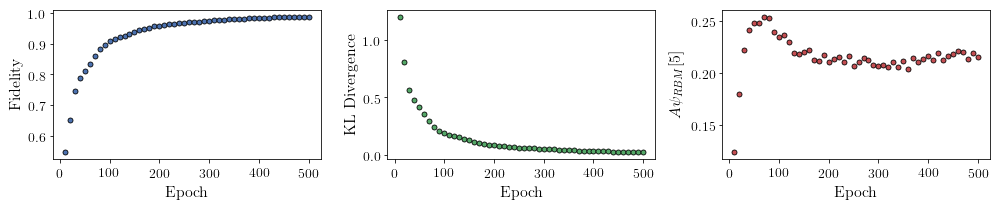

In [193]:
# Plotting
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 3))
ax = axs[0]
ax.plot(epoch, fidelities, "o", color="C0", markeredgecolor="black")
ax.set_ylabel(r"Fidelity")
ax.set_xlabel(r"Epoch")

ax = axs[1]
ax.plot(epoch, KLs, "o", color="C1", markeredgecolor="black")
ax.set_ylabel(r"KL Divergence")
ax.set_xlabel(r"Epoch")

ax = axs[2]
ax.plot(epoch, coeffs, "o", color="C2", markeredgecolor="black")
ax.set_ylabel(r"$A\psi_{RBM}[5]$")
ax.set_xlabel(r"Epoch")

plt.tight_layout()
plt.savefig("fid_KL.pdf")
plt.show()

In [194]:
nn_state.save("/Users/tuckerkj/Google Drive/Research/QML/data/quc_examples/Tutorial1_TrainPosRealWaveFunction/saved_params.pt")

In [196]:
nn_state.weights

Parameter containing:
tensor([[-0.3334, -0.2559,  0.0751,  0.0621,  0.0109,  0.4828,  1.0635,  1.7899,
          2.3865,  1.4415],
        [-0.6964, -1.0828, -0.4484, -0.1678,  0.2103,  0.3155,  0.1505, -0.7557,
         -2.5150, -1.9855],
        [-1.2171, -2.4773, -2.0330, -1.0679,  0.0550,  0.7207,  0.6184,  0.1699,
         -0.1638, -0.2593],
        [ 0.2037,  0.3178,  0.3273,  0.3911, -0.0192, -0.8425, -1.9110, -2.4214,
         -1.6171, -0.4318],
        [ 0.8111,  1.4979,  1.1150,  0.6729,  0.3641,  0.6965,  0.9374,  0.6665,
         -0.2513, -0.3465],
        [-0.3525, -0.3488,  0.0445,  0.0520, -0.8603, -2.0510, -1.8283, -0.8383,
          0.2492,  0.3091],
        [ 1.7107,  2.2573,  0.7507,  0.0520, -0.0820,  0.0814,  0.3321,  0.2159,
         -0.4460, -0.5085],
        [ 0.2009, -0.3491, -1.5924, -2.2818, -1.6282, -0.3137,  0.2718,  0.2203,
          0.0732, -0.1001],
        [-0.2236, -0.3884, -0.6538, -1.2180, -1.6851, -1.6157, -1.0226, -0.2093,
          0.5791,  0.4826

In [197]:
rbm.components_

array([[ 0.304486  ,  0.8106978 ,  1.06425738,  3.28148281,  2.35589358,
        -0.01661051, -0.49752003, -0.33077819,  0.07271698,  0.02082858],
       [ 0.70304674,  2.43053396,  1.16455604, -0.03149146,  0.62139987,
         1.43579018, -0.6493238 , -0.12740823,  0.27557127,  0.6173916 ],
       [-1.98595544, -4.39986318, -1.08056724,  0.558152  ,  0.75618306,
         0.8005421 , -0.4345694 ,  0.09439875,  0.48857363,  0.35935406],
       [-0.28486812, -1.17461053, -2.29640184, -2.57400427, -0.06241784,
         0.27203771, -0.18208376,  0.25344254,  0.24894442,  0.05226596],
       [-0.30004638, -0.16331757,  0.09048875, -0.15221028, -1.04105134,
        -1.77400619, -2.38085198, -0.82988316, -0.46938409,  0.30200201],
       [ 0.01341857, -0.44669072, -0.87112594, -0.76705045, -1.38759023,
        -0.98636663, -0.67152359, -1.41891321, -0.90455494, -0.50228535],
       [-0.0790479 ,  0.02929463, -0.01668326, -0.83024192, -2.5160395 ,
        -2.67786256, -0.74102772, -0.12045277

In [218]:
import torch
def get_psi_quc(nn_state):
    nc = nn_state.weights.shape[-1]
    psi = []
    norm = 0
    for d in range(2**nc):
        dbin = bit_array(np.binary_repr(d, width=10))
        val = nn_state.amplitude(torch.Tensor(dbin))
        psi.append(val[0])
        norm = norm + val*val
    norm = math.sqrt(norm)
    
    for ii in range(len(psi)):
        psi[ii] = psi[ii]/norm
        
    return np.array(psi)

In [219]:
psi_quc = get_psi_quc(nn_state)

In [220]:
psi_quc

array([0.29756127, 0.14222291, 0.08923962, ..., 0.10359893, 0.15315668,
       0.28970396])

In [221]:
np.savetxt('/Users/tuckerkj/Google Drive/Research/QML/data/quc_examples/Tutorial1_TrainPosRealWaveFunction/quc_psi.txt', psi_quc)